In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

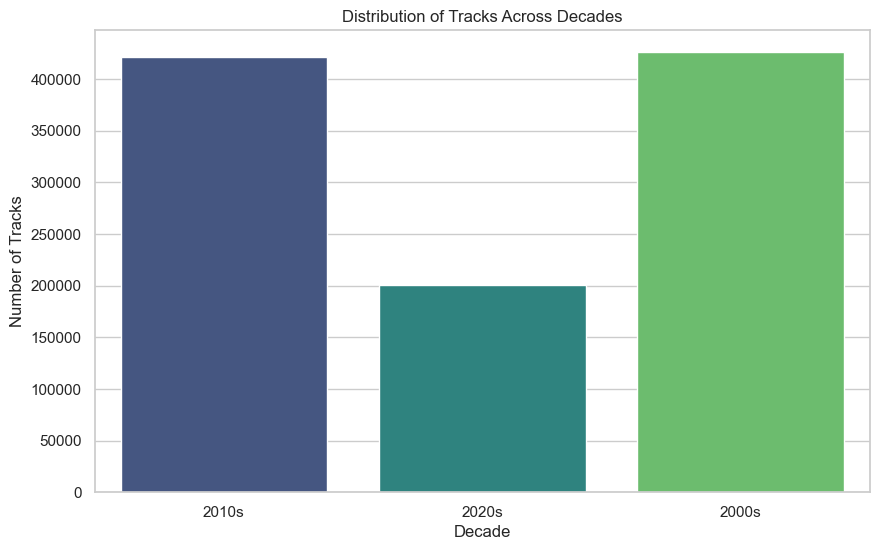

In [5]:
# Create the Count Plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Decade', data=data, palette='viridis')

plt.title('Distribution of Tracks Across Decades')
plt.xlabel('Decade')
plt.ylabel('Number of Tracks')

plt.show()


In [17]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
decade_data = data.groupby('Decade')[sound_features].mean().reset_index()
decade_data

,Decade,acousticness,danceability,energy,instrumentalness,liveness,valence
0,2000s,0.331814,0.530379,0.631817,0.247916,0.225382,0.486901
1,2010s,0.310175,0.540048,0.648673,0.252312,0.223747,0.434831
2,2020s,0.323983,0.548729,0.632585,0.258977,0.213611,0.425925


In [20]:
fig = px.line(decade_data, x='Decade', y=sound_features, 
              title='Trend of Various Sound Features Over Decades',
)

fig.update_layout(
    xaxis_title='Decade',
    yaxis_title='Mean Value of Sound Features',
    legend_title_text='Sound Features',
    height=600, width=1000
)

# Show the plot
fig.show()


In [21]:
decade_loudness = data.groupby('Decade')['loudness'].mean().reset_index()
decade_loudness

,Decade,loudness
0,2000s,-9.322790
1,2010s,-8.637435
2,2020s,-9.085838


In [24]:
fig = px.line(decade_loudness, x='Decade', y='loudness', 
              title='Trend of Loudness Over Decades')

fig.update_layout(
    xaxis_title='Decade',
    yaxis_title='Average Loudness (dB)',
    #yaxis=dict(tickmode='linear', tick0=-10, dtick=1) 
)

fig.show()

In [3]:
# Calculate the average popularity for each genre
genre_popularity = data.groupby('genre')['popularity'].mean().reset_index()

# Sort by popularity and get the top 10 genres
top10_genres = genre_popularity.sort_values(by='popularity', ascending=False).head(10).reset_index(drop=True)

top10_genres

,genre,popularity
0,pop,55.984232
1,hip-hop,46.685289
2,rock,46.188525
3,dance,43.092966
4,metal,39.811996
5,alt-rock,38.718804
6,sad,36.426972
7,indie-pop,35.867453
8,folk,33.707804
9,country,33.324242


In [4]:
top10_genres_list = top10_genres['genre'].tolist()
top10_genres_list
# Filter the original DataFrame to include only the top 10 genres
top10_genres_data = data[data['genre'].isin(top10_genres_list)]

In [5]:
# Calculate the mean values of the sound features for the top 10 genres
sound_features = top10_genres_data.groupby('genre')[['valence', 'energy', 'danceability', 'acousticness']].mean().reset_index()
sound_features

,genre,valence,energy,danceability,acousticness
0,alt-rock,0.453882,0.739463,0.502814,0.135120
1,country,0.526075,0.624492,0.570922,0.292943
2,dance,0.539382,0.722647,0.660364,0.133100
3,folk,0.441850,0.467128,0.528446,0.542608
4,hip-hop,0.519203,0.666753,0.716594,0.173439
5,indie-pop,0.452565,0.577771,0.540237,0.332117
6,metal,0.347045,0.882806,0.431940,0.027872
7,pop,0.489005,0.618253,0.593577,0.297064
8,rock,0.499427,0.660182,0.561591,0.225025
9,sad,0.632122,0.579895,0.674566,0.408790


In [13]:
fig = px.bar(sound_features, 
       x='genre', y=['valence', 'energy', 'danceability', 'acousticness'], 
       barmode='group', title='Trend of various sound features over top 10 genres')

fig.update_layout(
    xaxis_title='Genre',
    yaxis_title='Average Feature Value',
    legend_title='Sound Features',
    bargap=0.2,  
    bargroupgap=0.1,
    width = 800,
    height = 600
)

fig.show()

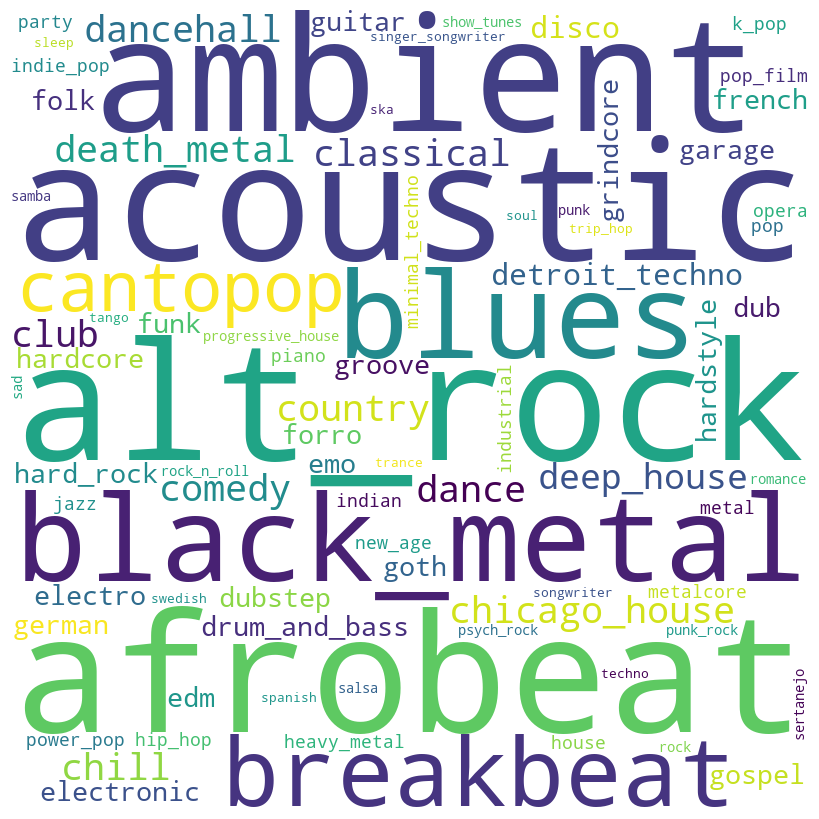

In [27]:
# Wordcloud of the genres
comment_words = ' '.join(data['genre'].str.replace('-', '_').unique())

# Generate the word cloud
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, max_words=82, min_font_size=10).generate(comment_words)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)

plt.show()

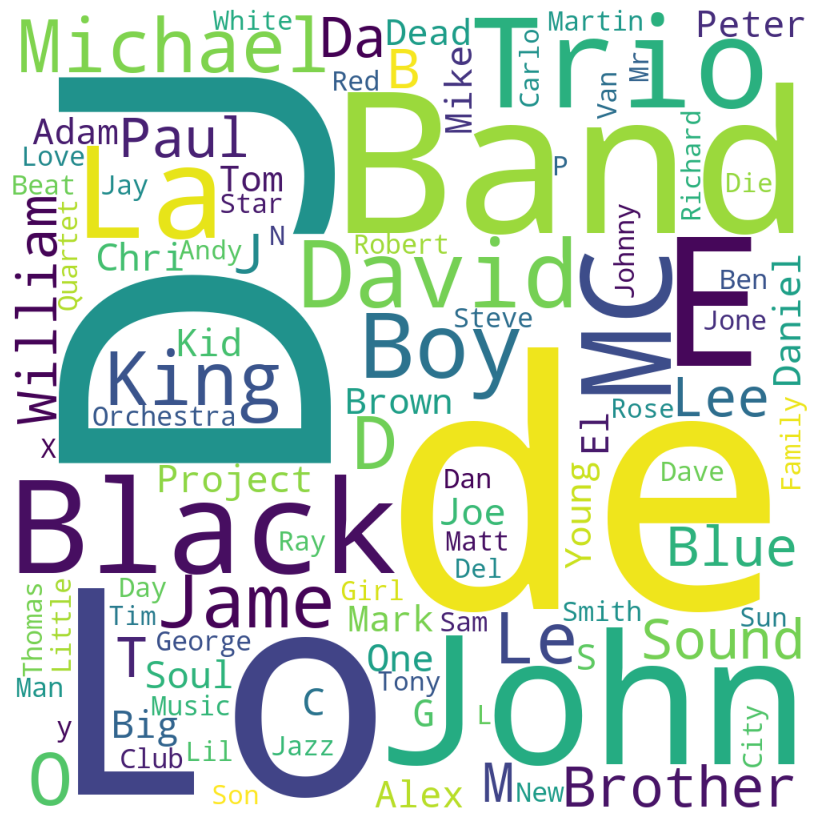

In [31]:
# Word cloud of the artists
comment_words = ' '.join(data['artist_name'].unique())

# Generate the word cloud
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=1000, height=1000, background_color='white', stopwords=stopwords, max_words=100, min_font_size=10).generate(comment_words)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)

plt.show()

In [34]:
# Counting the number of songs for each artist
artist_counts = data['artist_name'].value_counts().reset_index()
artist_counts.columns = ['Artist', 'songs']

# Sorting by the count in descending order
ordered_list = artist_counts.sort_values('songs', ascending=False)

# Selecting the top 10 artists
top10_most_song_produced_artists = ordered_list.head(10)

top10_most_song_produced_artists

,Artist,songs
0,Traditional,3498
1,Grateful Dead,2001
2,Johann Sebastian Bach,1972
3,Elvis Presley,1224
4,Giacomo Meyerbeer,1184
5,Wolfgang Amadeus Mozart,1047
6,Armin van Buuren,1027
7,Astor Piazzolla,827
8,Hans Zimmer,767
9,Andrei Krylov,757


In [46]:
# Group by artist name and calculate the average popularity
average_popularity = data.groupby('artist_name')['popularity'].mean().round().reset_index()

# Sorting by the popularity in descending order and selecting the top 10 artists
top10_popular_artists = average_popularity.sort_values('popularity', ascending=False).head(10).reset_index(drop=True)

top10_popular_artists

,artist_name,popularity
0,Elley Duhé,85.0
1,NewJeans,85.0
2,Rema,81.0
3,Fujii Kaze,80.0
4,Chani Nattan,80.0
5,SunKissed Lola,80.0
6,Jogja Hip Hop Foundation,80.0
7,Cian Ducrot,79.0
8,Oxlade,79.0
9,TINI,78.0


*Conclusion:*
**Metal genre really has a lot of energy to it meanwhile hip-hop is the genre that is most danceable to and folk genre has the most acousticness to it. The most popular genre is pop and loudness in music has decreased over decades.**